In [1]:
import numpy as np
import sklearn

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [109]:
num_variables = 1000
num_random = int(0.5 * num_variables)
num_real = num_variables - num_random
num_days = 26
noise_level = 0.3
data_mean = 0.5
data_std = 1.0

In [110]:
# make random variables normally distributed with unit variance with the same mean as data
random_vars = np.abs(np.random.randn(num_random, num_days) + mean_data)
random_vars *= data_std/np.std(random_vars)
random_vars += data_mean - np.mean(random_vars)


# build real vars
slope = num_days/float(num_real)
real_vars = np.zeros((num_real, num_days))
for v in range(num_real):
    index = int(np.floor(slope * v))
    real_vars[v,index] = 1
    
real_vars += noise_level * np.random.randn(num_real, num_days)
real_vars = np.abs(real_vars)
real_vars *= data_std/np.std(real_vars)
real_vars += data_mean - np.mean(real_vars)

# now shuffle the data so we can't tell what's real or random
new_variable_ordering = np.random.permutation(num_variables)
all_vars = np.vstack([random_vars, real_vars])
shuffled_vars = np.squeeze(all_vars[new_variable_ordering])

In [111]:
# are the statistics between the two sets different?
print('Means of real and random vars are %0.2f and %0.2f' %(np.mean(real_vars), np.mean(random_vars)))
print('Variance of real and random vars are %0.2f and %0.2f' %(np.mean(np.var(real_vars, axis=1)),
                                                               np.mean(np.var(random_vars, axis=1))))

Means of real and random vars are 0.50 and 0.50
Variance of real and random vars are 0.98 and 0.96


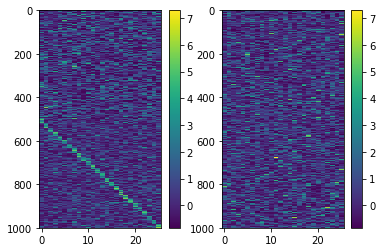

In [112]:
plt.subplot(1,2,1)
plt.imshow(all_vars, aspect='auto')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(shuffled_vars, aspect='auto')
plt.colorbar()